# Breast Cancer Prediction

## Aim

* **The objective of this project is to create a predictive model that can accurately classify breast
    cancer cases as benign or malignant based on a set of relevant features. By leveraging
    historical data and applying machine learning techniques, we aim to develop a reliable tool for
    assisting medical professionals in diagnosing breast cancer.**

## Project done by

* **Jokin Prabhu**

## Data Set
* **i have download the dataset from the kaggle website.**

## Introduction

* **Breast cancer is a prevalent and potentially life-threatening disease that affects millions of individuals worldwide. Early detection and accurate diagnosis are critical factors in improving patient outcomes. This project's primary objective is to harness the power of machine learning to create a predictive model capable of accurately classifying breast cancer cases as benign or malignant. By leveraging historical data and employing advanced data analysis techniques, we aim to develop a reliable tool to assist medical professionals in the early diagnosis of breast cancer.**

# Load The Modules

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Load the Dataset

In [47]:
df = pd.read_csv("C:\\Users\\Ragu.M\\Breast Cancer Prediction\\Breast_cancer_data.csv")


In [48]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [49]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [52]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

# I. Exploratory Data Analysis

## **1.Feature: mean_radius**

In [53]:
# skewness
df['mean_radius'].skew(axis=0)

0.9423795716730992

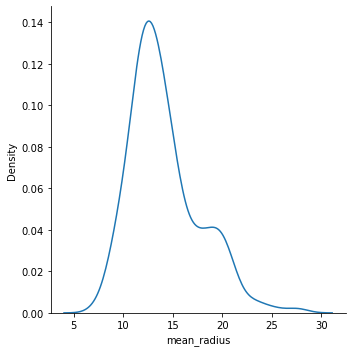

In [54]:
# Visualize skewness
sns.displot(df['mean_radius'], kind='kde')

C:\Users\Ragu.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_radius'>

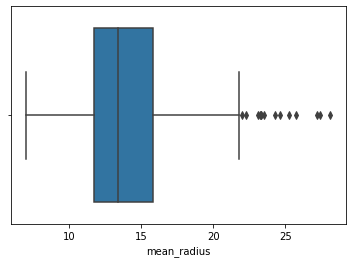

In [55]:
# Outlier Identification
sns.boxplot(df['mean_radius'])

we have found some upper outliers

## Feature 2:mean_texture

In [56]:
# skewness
df['mean_texture'].skew(axis=0)

0.6504495420828159

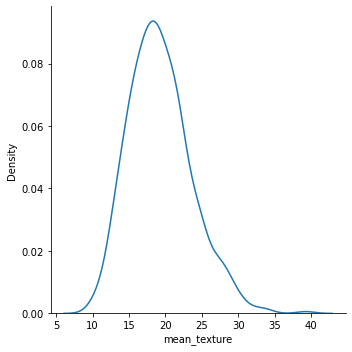

In [57]:
# Visualize the skewness
sns.displot(df['mean_texture'], kind='kde')

mean_texture is normally distributed

<AxesSubplot:>

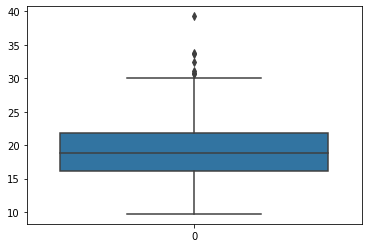

In [58]:
# Find the outliers
sns.boxplot(data=df['mean_texture'])

Found some upper outliers

## Feature 3: mean_perimeter

In [59]:
# skewness
df['mean_perimeter'].skew(axis=0)

0.9906504253930081

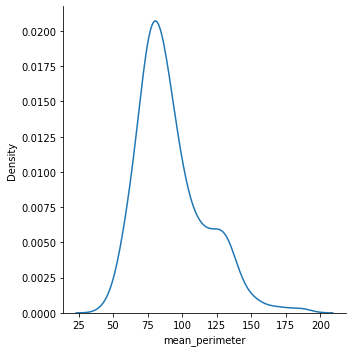

In [60]:
# visualize skewness
sns.displot(df['mean_perimeter'], kind='kde')

data is right skewed

C:\Users\Ragu.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_perimeter'>

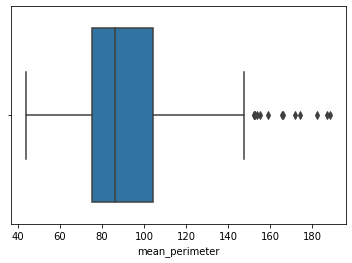

In [61]:
# find the outliers
sns.boxplot(df['mean_perimeter'])

found some upper outliers

## Feature 4:mean_area

In [62]:
df['mean_area'].skew(axis=0)

1.6457321756240424

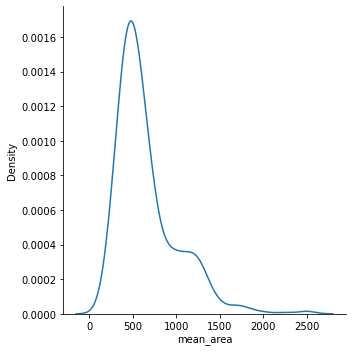

In [63]:
sns.displot(df['mean_area'],kind='kde')

feature is right skewed

<AxesSubplot:>

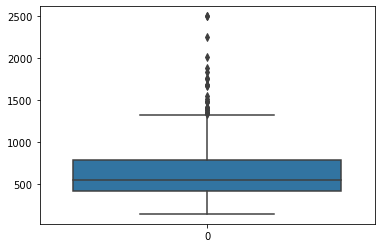

In [64]:
# Outliers
sns.boxplot(data=df['mean_area'])

Found upper outliers

## Feature 5: mean_smoothness

In [65]:
df['mean_smoothness'].skew(axis=0)

0.45632376481955844

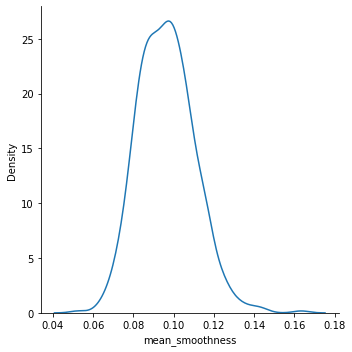

In [66]:
sns.displot(df['mean_smoothness'], kind='kde')

C:\Users\Ragu.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_smoothness'>

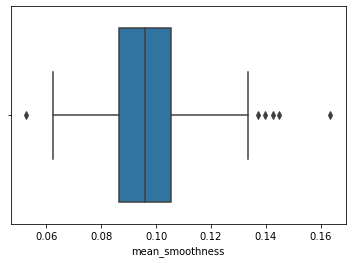

In [67]:
# Outliers
sns.boxplot(df['mean_smoothness'])

Found upper and lower outliers

## Feature 6: Diagnosis

In [68]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

## data imbalance test

In [69]:
(df.diagnosis.value_counts() / df.shape[0]) * 100

1    62.741652
0    37.258348
Name: diagnosis, dtype: float64

the data is balanced

## Feature selection

In [70]:
for feature in df.drop('diagnosis',axis=1).columns:
    print(feature)
    corr, p_value = pearsonr(df[feature], df.diagnosis)
    print(p_value<0.05)


mean_radius
True
mean_texture
True
mean_perimeter
True
mean_area
True
mean_smoothness
True


In [71]:
p_value<0.05

True

## Test for Normality

In [72]:
for feature in df.drop('diagnosis',axis=1).columns:
    print(feature)
    p_value= stats.normaltest(df[feature])[1]
    if(p_value>0.05):
        print("Normality test failed for the feature ", feature)

mean_radius
mean_texture
mean_perimeter
mean_area
mean_smoothness


## B. bi-variate Analysis

<AxesSubplot:>

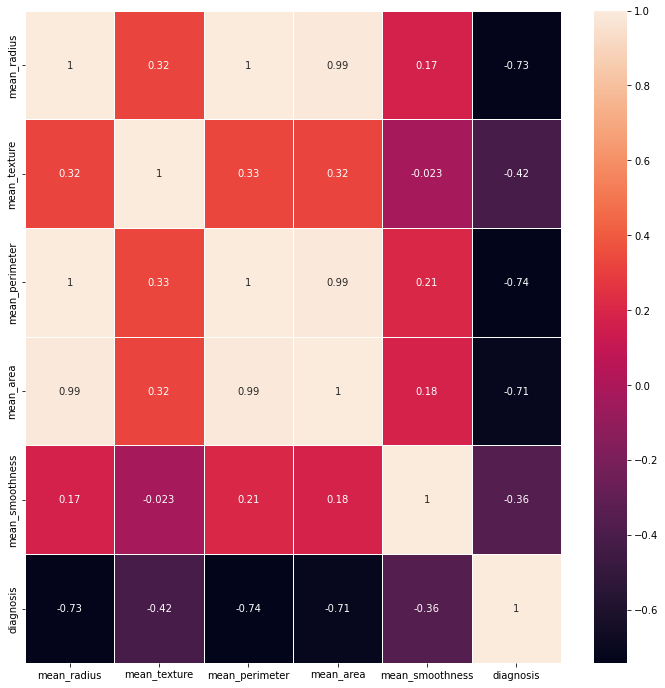

In [73]:
df_corr=df.corr()
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(df_corr, annot=True,linewidths=0.5,ax=ax)

mean_radius,mean_perimeter,mean_area are highly correlated where as mean_texture,mean_smoothness are moderately correlated

In [74]:
print(df_corr['diagnosis'].sort_values(ascending=False), '\n')

diagnosis          1.000000
mean_smoothness   -0.358560
mean_texture      -0.415185
mean_area         -0.708984
mean_radius       -0.730029
mean_perimeter    -0.742636
Name: diagnosis, dtype: float64 



## Pairplot

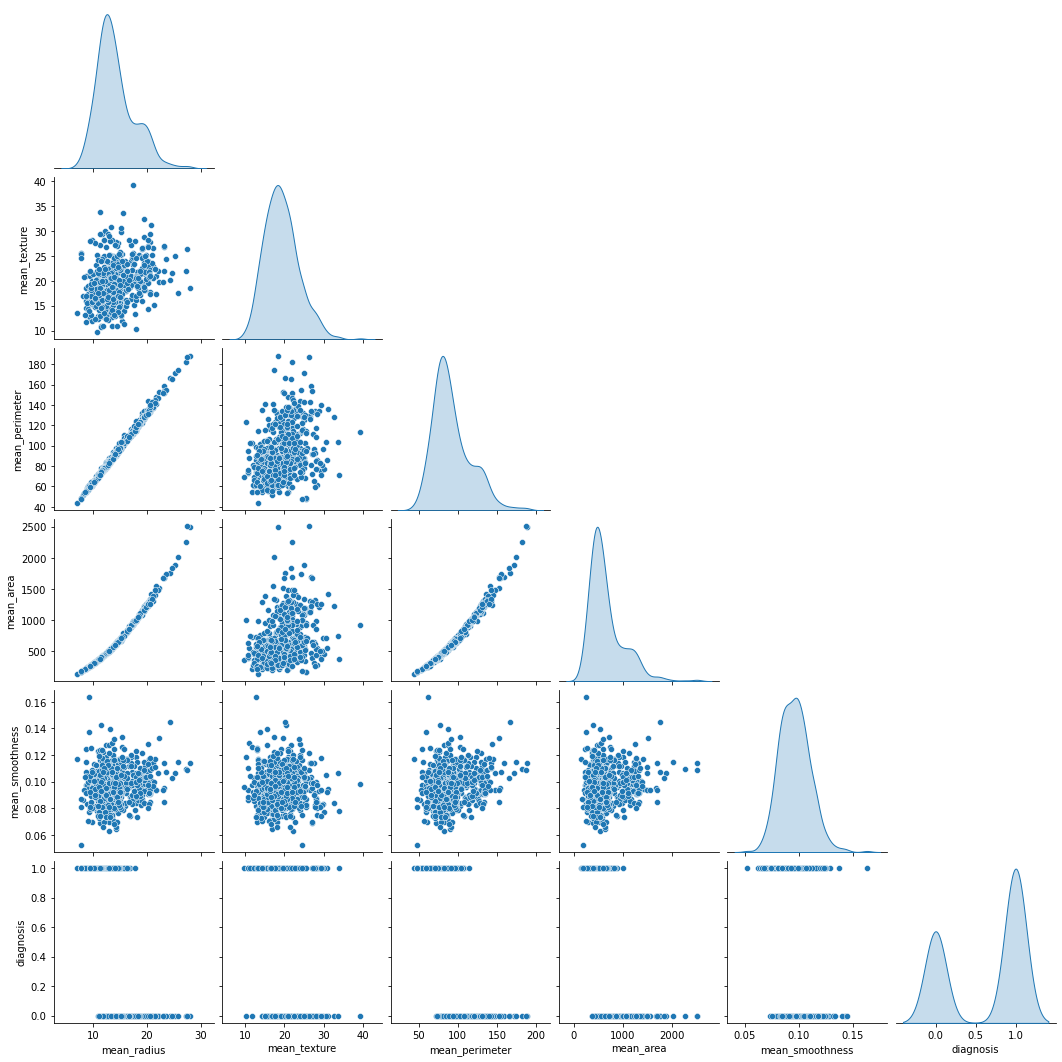

In [75]:
sns.pairplot(df,corner=True,diag_kind='kde')

## Feature Scaling

In [76]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']
sc= StandardScaler().fit(X)
X_scaled=pd.DataFrame(sc.transform(X),columns=X.columns)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,-1.256562e-16,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
mean_texture,569.0,1.049736e-16,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
mean_perimeter,569.0,-1.272171e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
mean_area,569.0,-1.900452e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
mean_smoothness,569.0,-8.226187e-16,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911


In [77]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

## Outliers Handling

In [78]:
X_scaled = np.clip(X_scaled,-4,5)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,-1.256562e-16,1.000880,-2.029648,-0.689385,-0.215082,0.469393,3.971288
mean_texture,569.0,1.049736e-16,1.000880,-2.229249,-0.725963,-0.104636,0.584176,4.651889
mean_perimeter,569.0,-1.272171e-16,1.000880,-1.984504,-0.691956,-0.235980,0.499677,3.976130
mean_area,569.0,-8.705966e-04,0.996405,-1.454443,-0.667195,-0.295187,0.363507,5.000000
mean_smoothness,569.0,-8.226187e-16,1.000880,-3.112085,-0.710963,-0.034891,0.636199,4.770911


## Model Training

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [80]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
68,-1.447987,-0.456023,-1.366651,-1.150124,0.728714
181,1.977508,1.694187,2.089619,1.866047,1.262455
63,-1.407089,-1.263516,-1.349763,-1.120545,-1.362838
248,-0.987600,1.380033,-0.986877,-0.875668,0.014925
60,-1.123927,-1.026155,-1.129395,-0.975496,1.212639
...,...,...,...,...,...
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571
270,0.046211,-0.574704,-0.068748,-0.063392,-2.282296
435,-0.041833,0.076875,-0.034972,-0.157532,0.686015


In [81]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 5), (114, 5), (455,), (114,))

In [82]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)>0.5

In [83]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
print(R2)

0.7759580740255486


R_square value with greter than>0.5 is better 

In [84]:
y_pred

array([ True, False, False,  True,  True, False, False, False,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False,  True,  True,  True, False,
        True,  True, False,  True, False, False])

## Accuracy Metrics

In [85]:
accuracy_score(y_test,y_pred)

0.9473684210526315

Got a good accuracy of ~95%

In [86]:
# Confusion_matrix
confusion_matrix(y_test,y_pred)

array([[38,  5],
       [ 1, 70]], dtype=int64)

In [87]:
'MAE: ', mean_squared_error(y_test,y_pred)

('MAE: ', 0.05263157894736842)

In [88]:
mean_absolute_error(y_test,y_pred)

0.05263157894736842

In [89]:
lr.coef_

array([ 0.15366558, -0.10381279, -0.76157241,  0.31175028, -0.10434338])

In [90]:
lr.intercept_

0.6199598122889786

## Conclusion
* **The Breast Cancer Prediction project is not only a data science endeavor but also a life-saving initiative. By developing a predictive model that aids in the early diagnosis of breast cancer, we aim to contribute to improved patient outcomes and the overall well-being of individuals affected by this disease. This project represents a convergence of medical knowledge and advanced data analysis techniques, with the ultimate goal of enhancing the capabilities of healthcare professionals in the fight against breast cancer.**